# <font color='red'>IRIS DATASET CLUSTERING</font>

### <font color='BLUE'>PROBLEM STATEMENT</font>

Using the iris flower dataset from `sklearn.datasets`, train a clustering model. Determine the accuracy of the model and use it to predict various samples in the test dataset. The iris dataset comprises 150 samples with the following features:

- **Sepal Length**
- **Sepal Width**
- **Petal Length**
- **Petal Width**

Classify each flower into one of three categories:

- **Setosa**
- **Versicolour**
- **Virginica**irginica


### <font color='BLUE'>OBJECTIVE</font>
The objective of this exercise is to train a clustering model using the iris flower dataset, determine its accuracy, and use it to predict the categories of various samples in the test dataset.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### <font color='BLUE'>DATA COLLECTTION</font>

In [4]:
#Load iris dataset
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
#target attribute which will give target variable, and already imported in numeric value from categorical data.
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# Create a DataFrame
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
# Add the target variable 'species' to the DataFrame
df['class'] = iris_data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### <font color='BLUE'>DATA DESCRIPTION</font>


The iris dataset is a classic dataset used for pattern recognition and classification, consisting of 150 samples of iris flowers. Each sample is described by four features: sepal length, sepal width, petal length, and petal width, all measured in centimeters. The purpose of the dataset is to classify these samples into three distinct species of iris flowers: Setosa, Versicolour, and Virginica. The sepal length and width refer to the size of the outer parts of the flower that protect the petals, while the petal length and width refer to the size of the actual petals. Each of the 150 samples in the dataset is labeled with one of the three species: Setosa (label 0), Versicolour (label 1), or Virginica (label 2).

### <font color='BLUE'>EXPLORATORY DATA ANALYSIS (EDA)</font>

In [8]:
df.shape

(150, 5)

In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [13]:
df["class"].value_counts()

class
0    50
1    50
2    50
Name: count, dtype: int64

In [14]:
#checking unique values 
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}, Length: {len(unique_values)}")

Unique values in sepal length (cm): [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9], Length: 35
Unique values in sepal width (cm): [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6], Length: 23
Unique values in petal length (cm): [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2], Length: 43
Unique values in petal width (cm): [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3], Length: 22
Unique values in class: [0 1 2], Length: 3


In [15]:
#Checking for duplicates
df.duplicated().sum()

1

In [16]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

In [17]:
#Extracting column names except column class
col1 = df.columns.difference(['class'])

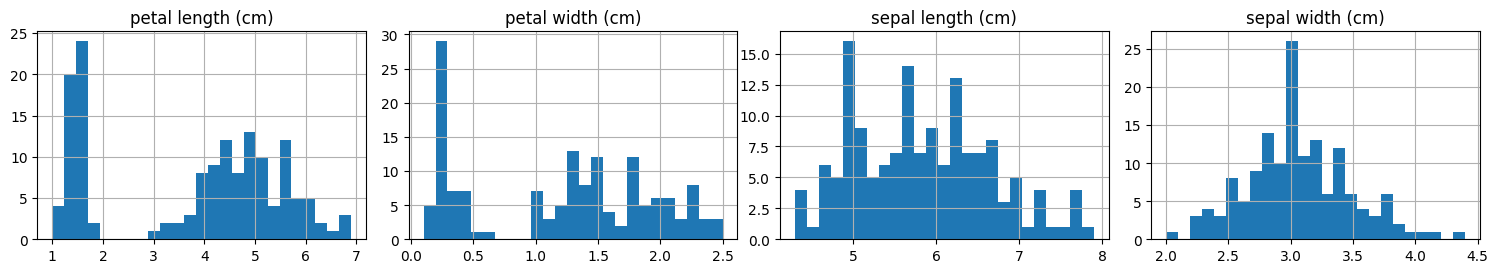

In [18]:
#create histogram for all columns
df[col1].hist(bins=25,figsize=(15,10),layout=(4,4))
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

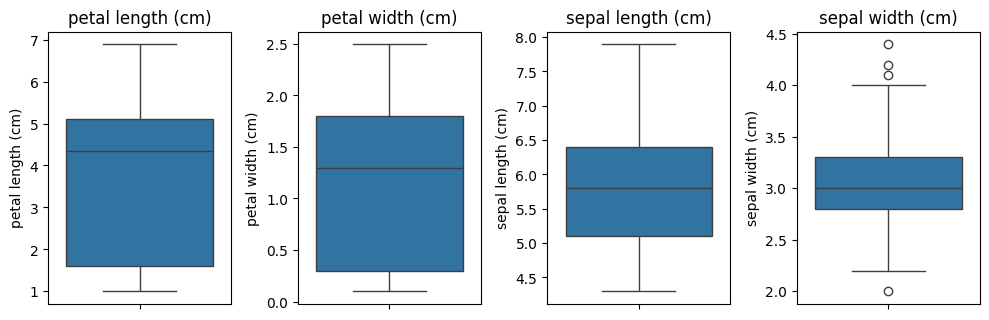

In [19]:
#Box plot to identify outliers
plt.figure(figsize=(10,15))
#enumerate is a buit in fn that allows you to loop over an iterable and have an automatic counter
for i,col in enumerate(col1):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show

##### The  sepal width column contain outliers

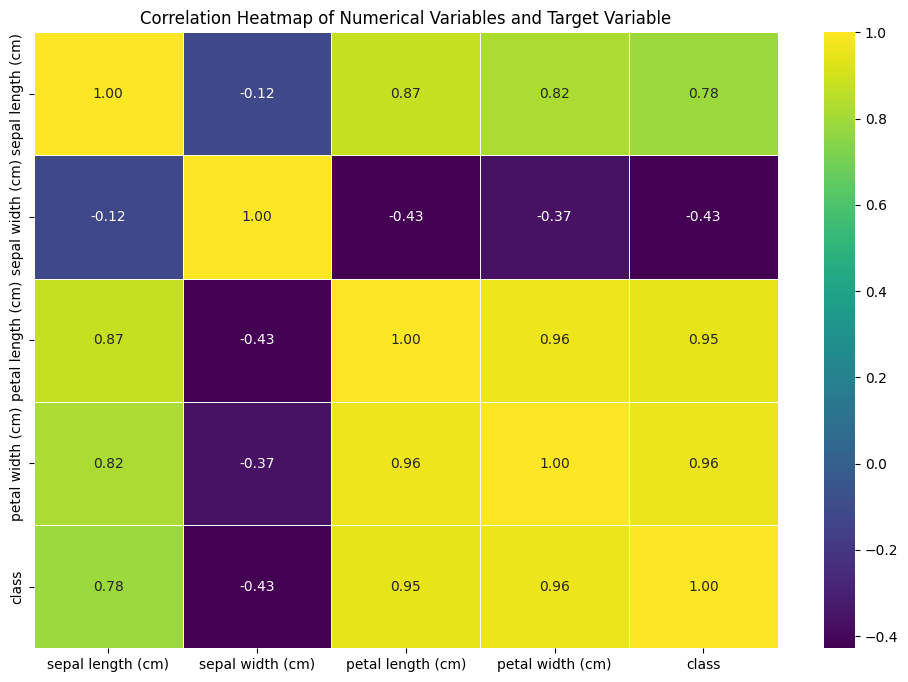

In [20]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables and Target Variable')
plt.show()

### <font color='BLUE'>DATA PREPROCESSING</font>

### Outlier Treatment

In [21]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [22]:
#removing outliers using capping
for i in df.select_dtypes(include="number").columns:
    lw,uw=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

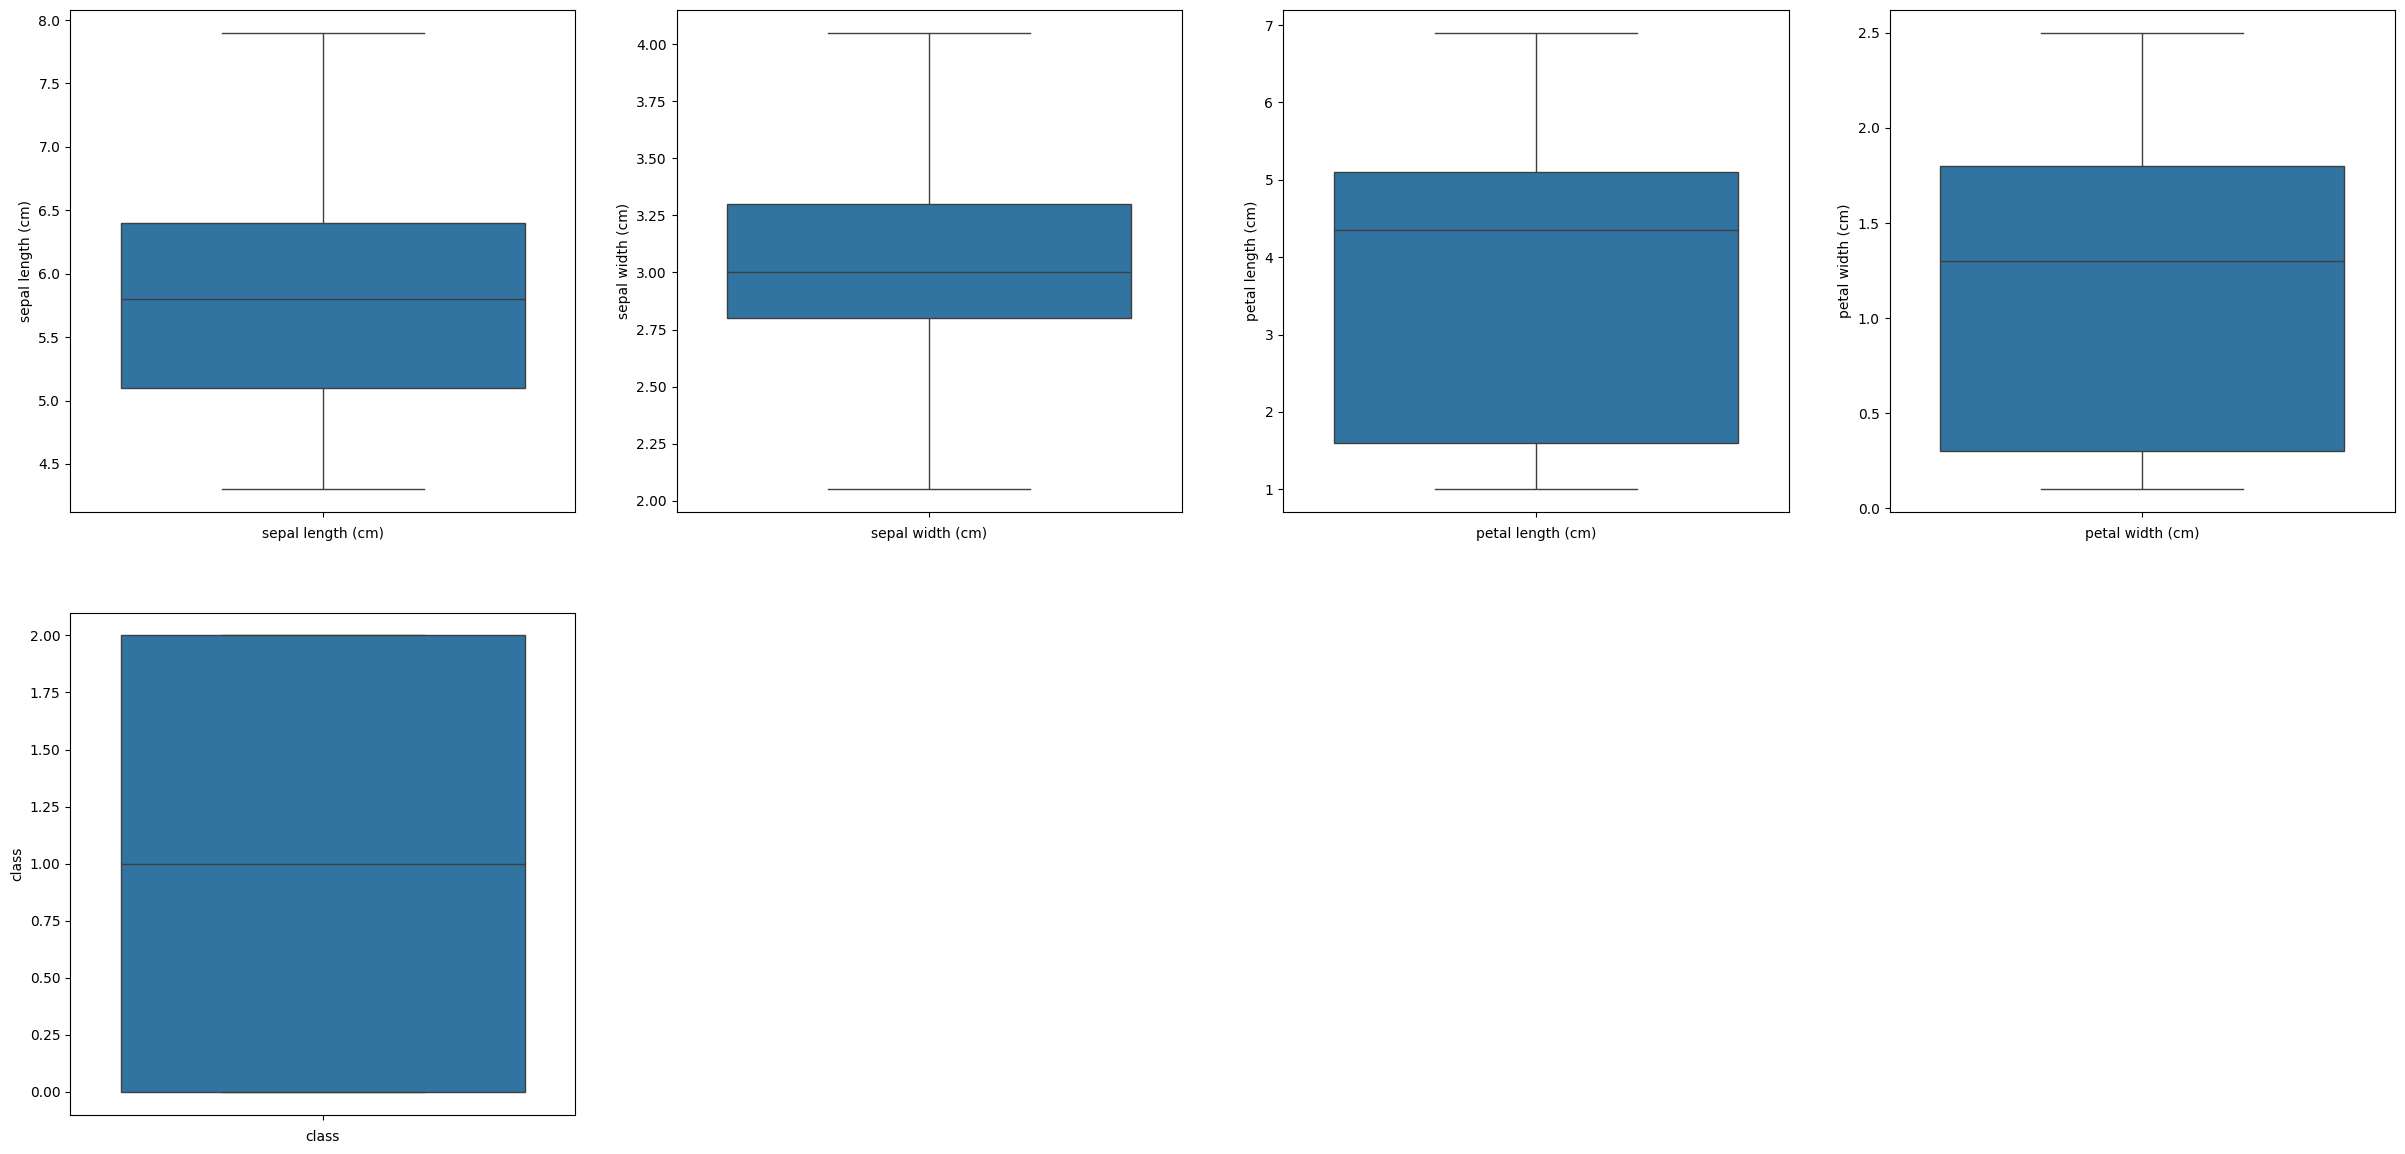

In [23]:
#box plot after outlier treatment
fig = plt.figure(figsize=(30,30))
counter = 0

for col in df.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

In [24]:
df.shape

(150, 5)

##### There are no categorical columns, thus encoding is not required.

### Feature Scaling

In [25]:

from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[col1])

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(df_scaled, columns=col1)

df[col1] = scaled_df

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,0.222222,0.725,0.067797,0.041667,0.0
1,0.166667,0.475,0.067797,0.041667,0.0
2,0.111111,0.575,0.050847,0.041667,0.0
3,0.083333,0.525,0.084746,0.041667,0.0
4,0.194444,0.775,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.475,0.711864,0.916667,2.0
146,0.555556,0.225,0.677966,0.750000,2.0
147,0.611111,0.475,0.711864,0.791667,2.0
148,0.527778,0.675,0.745763,0.916667,2.0


### <font color='BLUE'>VISUALIZATION</font>

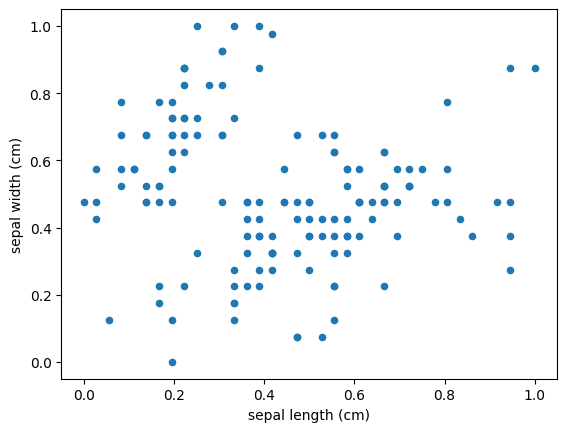

In [26]:
df.plot.scatter(x='sepal length (cm)', y='sepal width (cm)')
plt.show()

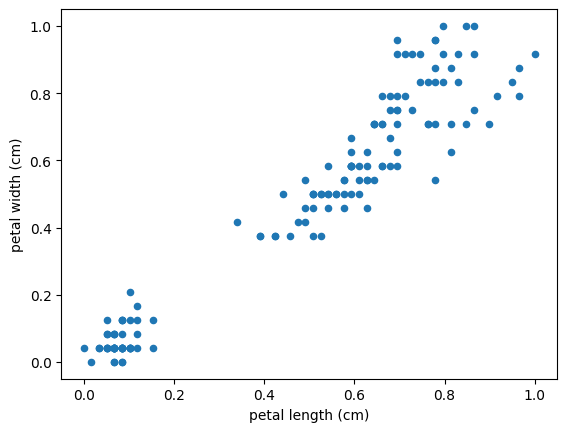

In [27]:
df.plot.scatter(x='petal length (cm)', y='petal width (cm)')
plt.show()

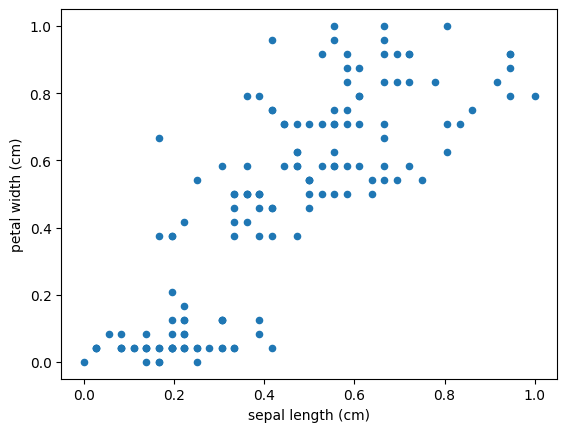

In [28]:
df.plot.scatter(x='sepal length (cm)', y='petal width (cm)')
plt.show()

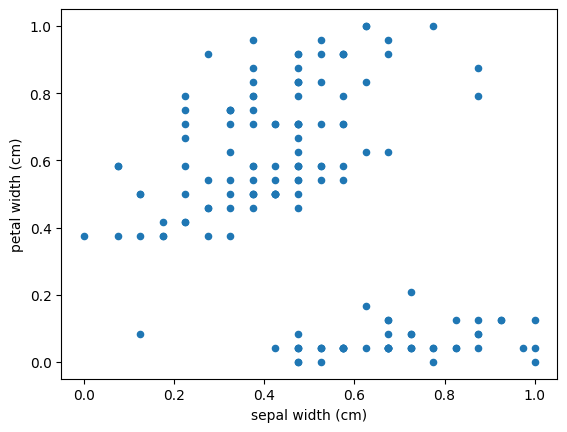

In [29]:
df.plot.scatter(x='sepal width (cm)', y='petal width (cm)')
plt.show()

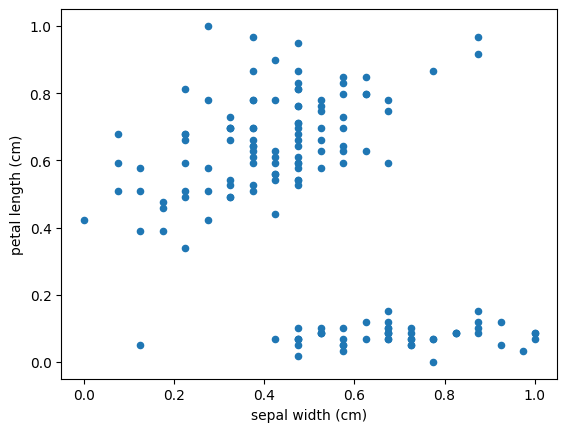

In [30]:
df.plot.scatter(x='sepal width (cm)', y='petal length (cm)')
plt.show()

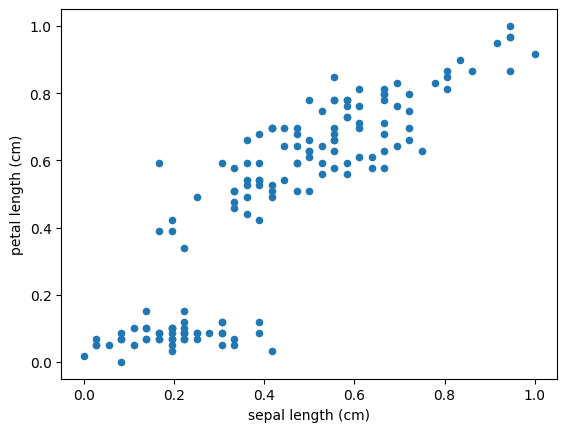

In [31]:
df.plot.scatter(x='sepal length (cm)', y='petal length (cm)')
plt.show()

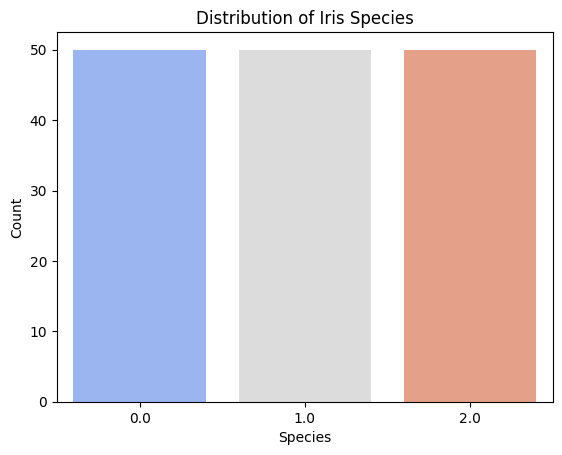

In [32]:
# Create a count plot for the target column 'class'
sns.countplot(x='class', data=df, palette = 'coolwarm')
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

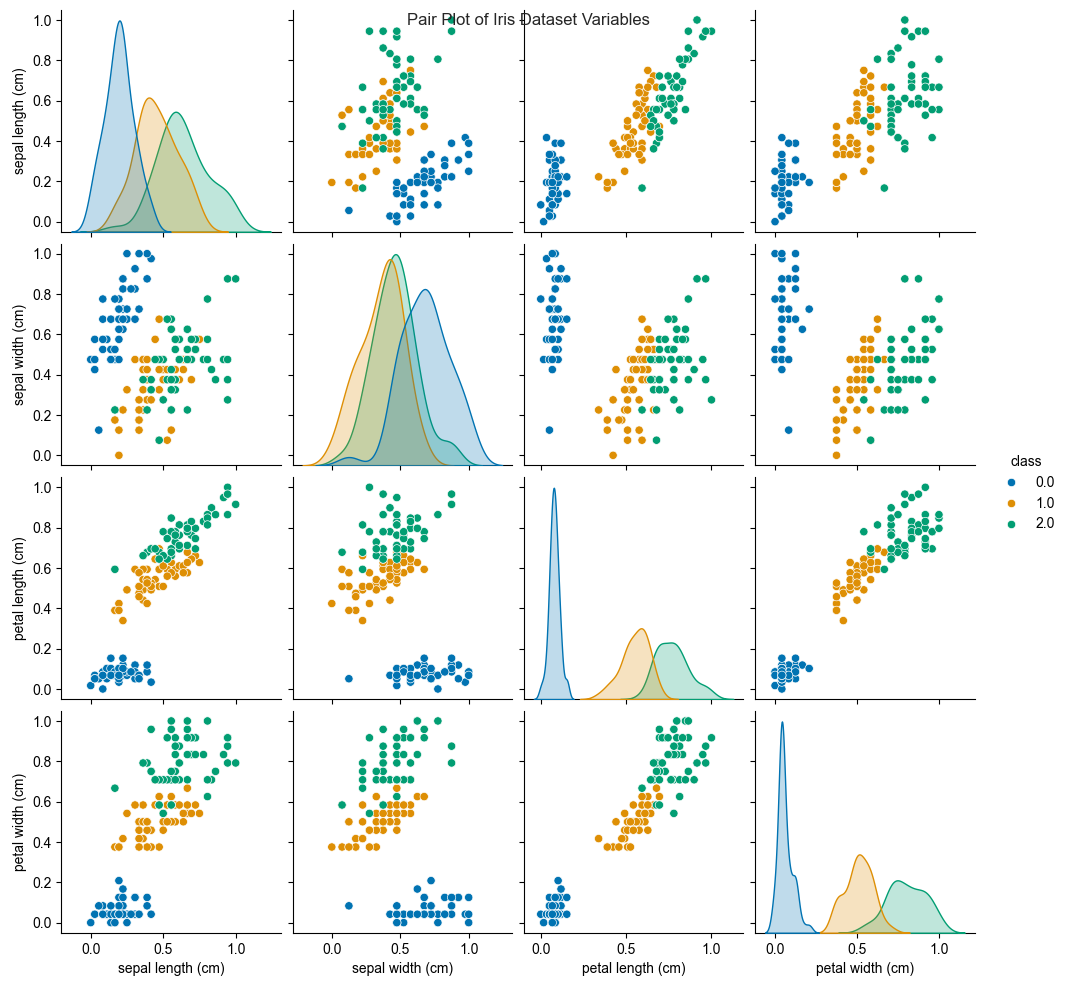

In [33]:
#create a pair plot
sns.pairplot(df,hue='class', palette='colorblind')
sns.set_style("whitegrid")
plt.suptitle("Pair Plot of Iris Dataset Variables")
plt.show()

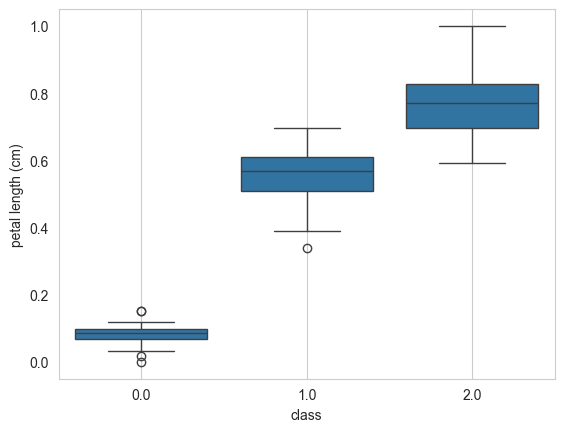

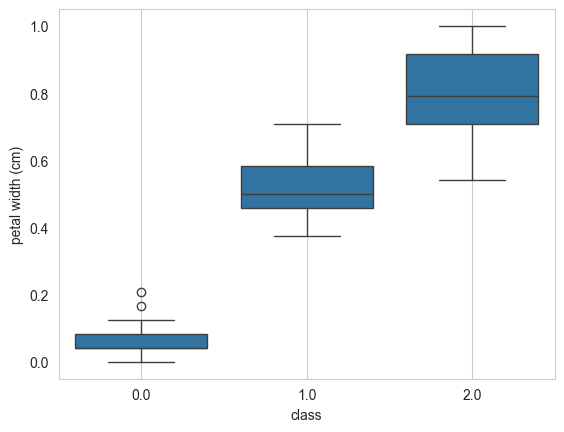

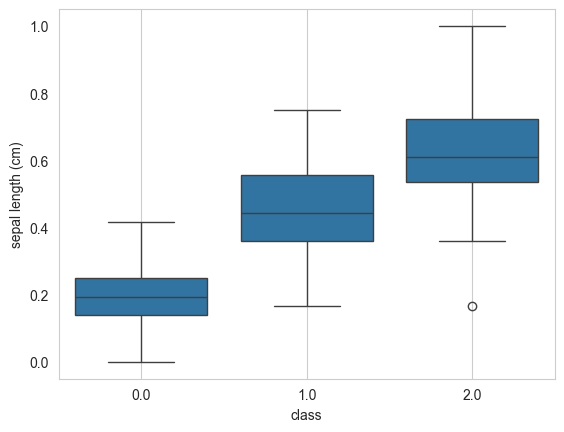

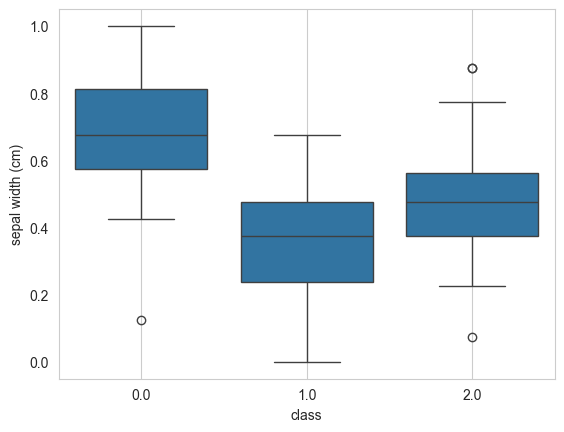

In [34]:
for col in df[col1]:
    plt.figure()
    sns.boxplot(data=df, x="class", y=df[col])
    plt.grid()
    plt.show()

### <font color='BLUE'>MODEL BUILDING</font>

In [35]:
clustering_data = df.drop('class',axis=1)
clustering_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.725,0.067797,0.041667
1,0.166667,0.475,0.067797,0.041667
2,0.111111,0.575,0.050847,0.041667
3,0.083333,0.525,0.084746,0.041667
4,0.194444,0.775,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.475,0.711864,0.916667
146,0.555556,0.225,0.677966,0.750000
147,0.611111,0.475,0.711864,0.791667
148,0.527778,0.675,0.745763,0.916667


### <font color='GREEN'>K-MEANS CLUSTERING</font>


### <font color='BROWN'>Elbow Plot</font>

In [36]:
#Import kmeans
from sklearn.cluster import KMeans

In [37]:
# List to store the WCSS values
wcss = []

# Calculate WCSS for different numbers of clusters
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(clustering_data)
    wcss.append(km.inertia_)

# Convert WCSS list to a numpy array 
wcss_array = np.array(wcss)
wcss_array

array([42.99236227, 13.27235533,  7.93863481,  6.74769435,  5.22765276,
        4.99579571,  4.5779536 ,  3.57477875,  3.18965923,  3.0024816 ])

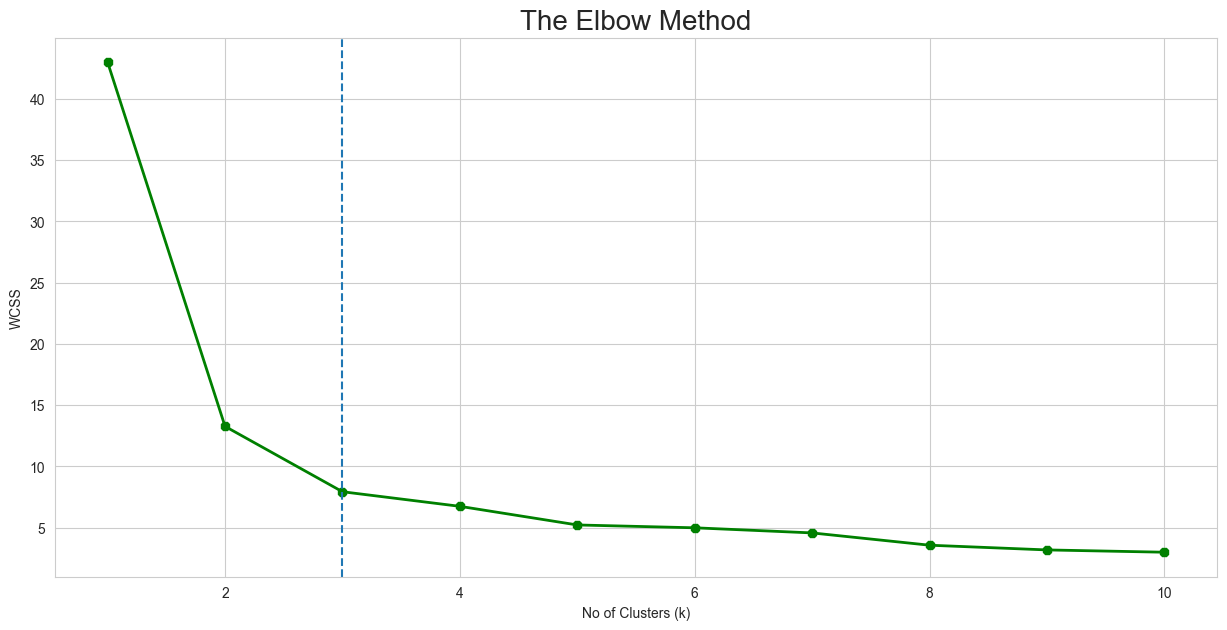

In [38]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,11),wcss,linewidth = 2, color = 'green',marker = '8')
plt.axvline(x=3,ls='--')
plt.ylabel('WCSS')
plt.xlabel('No of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

##### The optimal number of clusters for our data appears to be three. This conclusion is based on the observation that the slope of the Within-Cluster Sum of Squares (WCSS) curve significantly decreases after \( k = 3 \). The last noticeable "elbow" in the curve, indicating a point beyond which the addition of more clusters does not result in a substantial reduction in WCSS, occurs at \( k = 3 \). Consequently, selecting a higher range of clusters would not provide a clearer identification of the elbow point and may lead to overfitting.

In [39]:
km = KMeans(n_clusters = 3)
km.fit(clustering_data)

KMeans(n_clusters=3)

In [40]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = km.fit_predict(clustering_data)
clusters.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster_Prediction
0,0.222222,0.725,0.067797,0.041667,1
1,0.166667,0.475,0.067797,0.041667,1
2,0.111111,0.575,0.050847,0.041667,1
3,0.083333,0.525,0.084746,0.041667,1
4,0.194444,0.775,0.067797,0.041667,1


In [41]:
km.cluster_centers_

array([[0.67476852, 0.521875  , 0.76553672, 0.79079861],
       [0.19611111, 0.6835    , 0.07830508, 0.06083333],
       [0.42521368, 0.30913462, 0.56649283, 0.53285256]])

### <font color='BROWN'>Silhouette Coefficient</font>

##### To evaluate clustering quality, we can use the silhouette score, which measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates better clustering.

In [42]:
from sklearn.metrics import silhouette_score
si=[]
k_rng = range(2,11)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km_pred=km.fit_predict(clustering_data)
    si.append(silhouette_score(clustering_data,km_pred))
si

[0.621372977569765,
 0.4806656975116473,
 0.43661866056550724,
 0.4065128029804172,
 0.3527654687890423,
 0.3438449588155449,
 0.34910702629030094,
 0.3236511915465754,
 0.34791573352521626]

In [43]:
silhouette_score(clustering_data,km_pred)

0.34791573352521626

Text(0.5, 1.0, 'Silhouette Score vs. Number of Clusters')

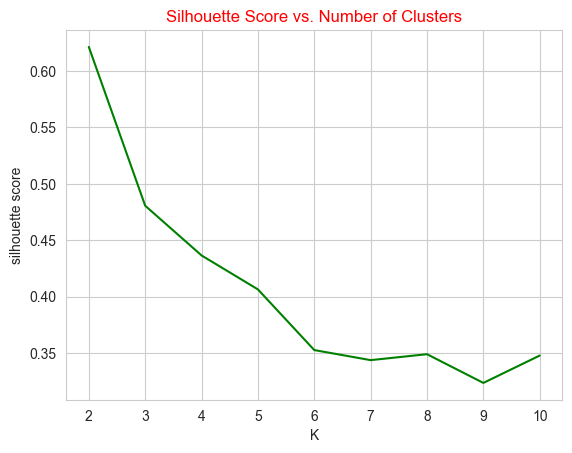

In [44]:
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.plot(k_rng,si,color='green')
plt.title('Silhouette Score vs. Number of Clusters',color='red')

#####  Determining the Optimal Number of Clusters

- **Highest Silhouette Score**: Look for the value of \( k \) (number of clusters) that corresponds to the highest silhouette score on the plot. This value indicates the optimal number of clusters according to the silhouette score metric.

- **Overall Trend**: Evaluate the overall trend of the silhouette scores as \( k \) increases. Typically, silhouette scores closer to 1 indicate better clustering, while scores closer to 0 or negative values suggest overlapping or poorly defined clusters.







In [45]:
optimalkmeans = KMeans(n_clusters = 2,init = 'k-means++', max_iter = 300,n_init = 10, random_state = 0)
y_kmeansbest = optimalkmeans.fit_predict(clustering_data)

In [46]:
silhouette_score(clustering_data, y_kmeansbest)

0.621372977569765

### <font color='GREEN'>HIERARCHICAL CLUSTERING</font>

In [47]:
import scipy.cluster.hierarchy as shc

### <font color='BROWN'>Dendrogram visualization with scipy</font>

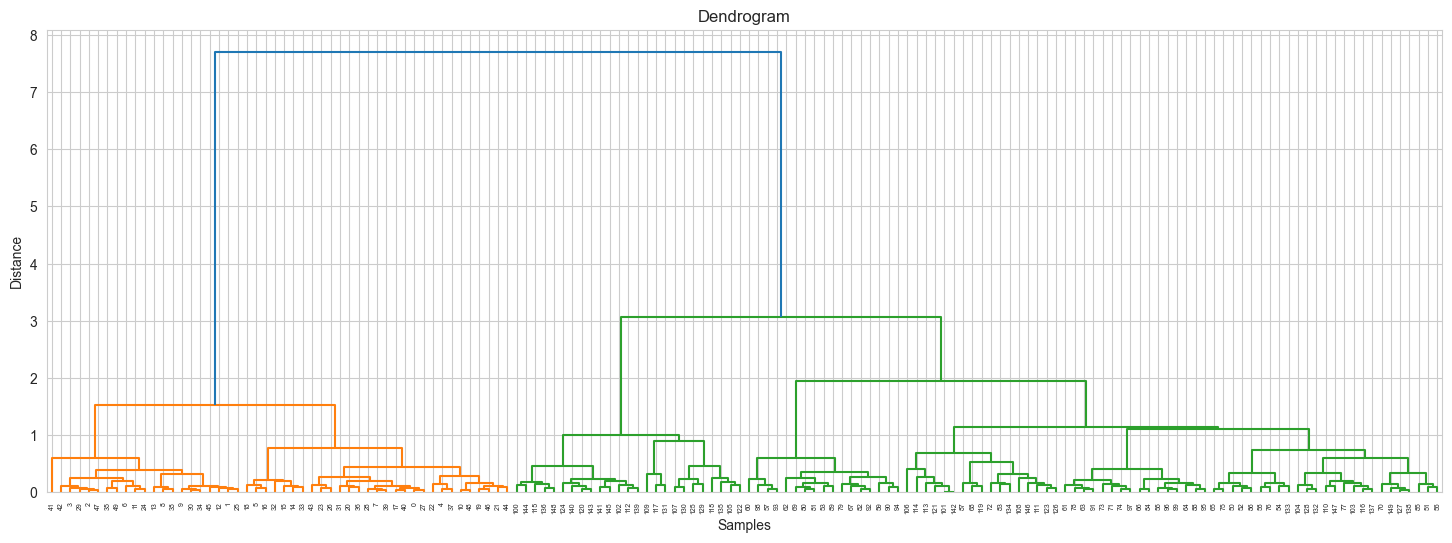

In [48]:
plt.figure(figsize=(18, 6))
# Calculate linkage using Ward's method and create the dendrogram
dendro = shc.dendrogram(shc.linkage(clustering_data, method="ward"))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

#### Steps for Hierarchical Clustering

1. **Visual Inspection**: Examine the dendrogram for notable jumps or gaps in the vertical lines, indicating larger differences between clusters.
2. **Select the Threshold**: Choose a point with a significant gap in the vertical lines to serve as the threshold for drawing the horizontal line.
3. **Draw the Horizontal Line**: Draw a horizontal line at the chosen threshold.
4. **Count the Clusters**: Determine the number of clusters by counting the vertical lines that intersect the horizontal line.







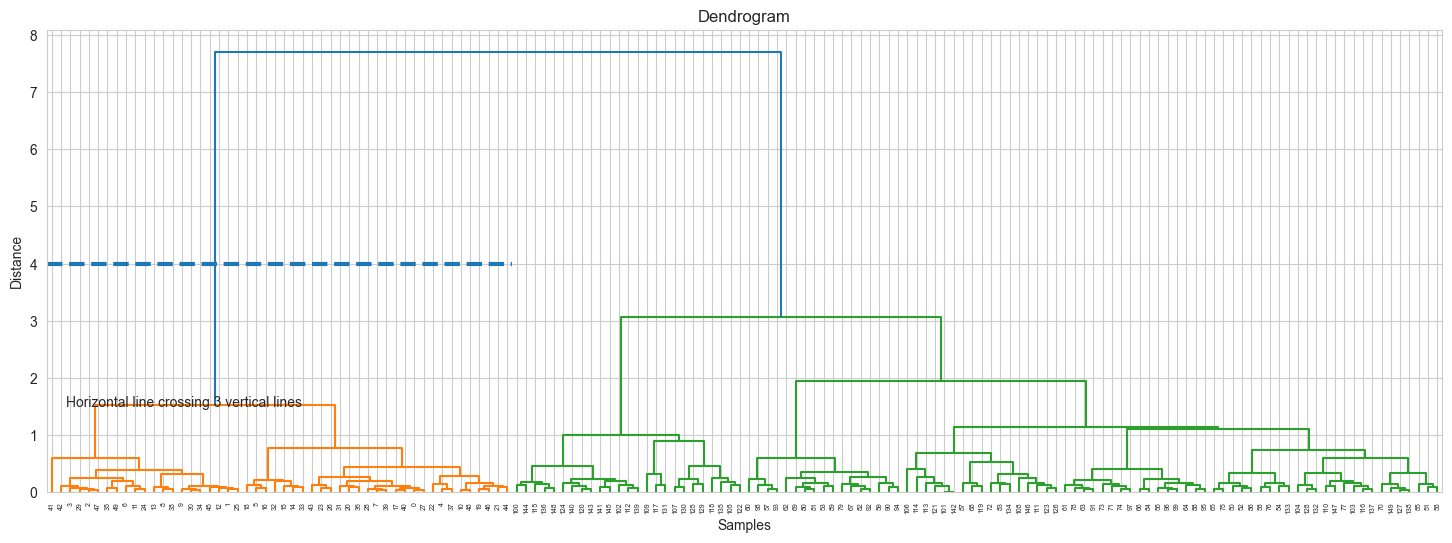

In [49]:
plt.figure(figsize=(18, 6))
dendro = shc.dendrogram(shc.linkage(clustering_data, method="ward"))
plt.hlines(y=4,xmin=0,xmax=500,lw=3,linestyles='--')
plt.text(x=20,y=1.5,s='Horizontal line crossing 3 vertical lines')
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

### <font color='GREEN'>AGGLOMERATIVE CLUSTERING</font>

In [50]:
#build the model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
hc_pred = hc.fit_predict(clustering_data)
hc_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [51]:
clustering_data['cluster']=hc_pred
clustering_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,0.222222,0.725,0.067797,0.041667,1
1,0.166667,0.475,0.067797,0.041667,1
2,0.111111,0.575,0.050847,0.041667,1
3,0.083333,0.525,0.084746,0.041667,1
4,0.194444,0.775,0.067797,0.041667,1


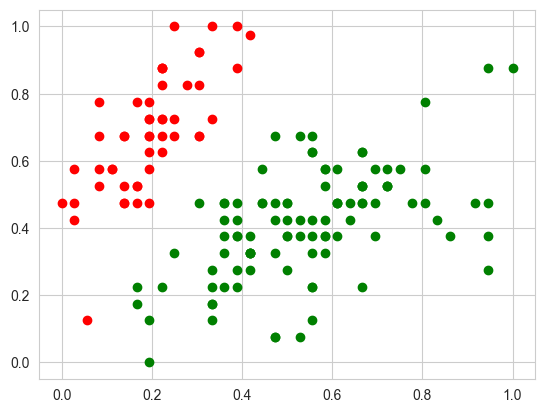

In [52]:
# Assuming 'cluster' is the column name containing cluster labels
df1 = clustering_data[clustering_data['cluster'] == 0]
df2 = clustering_data[clustering_data['cluster'] == 1]
df3 = clustering_data[clustering_data['cluster'] == 2]

plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green', label='Cluster 0')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', label='Cluster 1')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color='black', label='Cluster 2')

In [54]:
silhouette_score(clustering_data,hc_pred)

0.7401602933322631

### <font color='blue'>CONCLUSION</font>

With a silhouette score of 0.740 the hierarchical clustering algorithm adeptly organized the data into distinct clusters. The dendrogram facilitated the identification of the optimal cluster count, while the resultant clusters exhibited notable separation and cohesion. This analysis underscores the applicability of hierarchical clustering to this dataset, establishing a solid groundwork for subsequent analysis and application.







